In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

from tqdm import tqdm

%matplotlib inline

In [6]:
df = pd.read_csv("wine.csv")

In [7]:
df.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,$32,87,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15%,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5%,$18,86,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5%,$21,85,NaN,"This intriguing blend of Falanghina, Biancolel..."


In [8]:
def clean_price(val):
    if val == val:
        if val[1:].isnumeric():
            return float(val[1:])
    return

def clean_alcohol(val):
    if val == val:
        if val[:-1].isnumeric():
            return float(val[:-1])
    return

def clean_all(val):
    if val == val:
        return val
    return

df.price = df.price.apply(clean_price)
df.alcohol = df.alcohol.apply(clean_alcohol)

for col in df.columns:
    df[col] = df[col].apply(clean_all)

# for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
#     wine = row['wine']
#     winery = row['winery']
#     # row['wine'] = wine.replace(winery, '')
#     df.loc[idx, 'wine'] = wine.replace(winery, '').strip()

def get_clean_wine(wine, winery):
    res = []
    for w, wy in tqdm(zip(wine, winery), total=len(wine)):
        res.append(w.replace(wy, '').strip())
    return res

df['wine'] = get_clean_wine(df.wine, df.winery)

df.head()
df.dropna().to_csv("clean_wine.csv", index=False)

100%|██████████| 323237/323237 [00:00<00:00, 1049468.04it/s]


In [5]:
df.describe()

,alcohol,price,rating
count,95959.000000,291920.000000,323237.000000
mean,13.928428,35.601833,88.585119
std,44.284787,45.322691,3.186544
min,1.000000,3.000000,80.000000
25%,13.000000,17.000000,86.000000
50%,13.000000,25.000000,88.000000
75%,14.000000,42.000000,91.000000
max,8333.000000,8500.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323237 entries, 0 to 323236
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   wine         323237 non-null  object 
 1   winery       323237 non-null  object 
 2   category     323237 non-null  object 
 3   designation  229692 non-null  object 
 4   varietal     302190 non-null  object 
 5   appellation  320630 non-null  object 
 6   alcohol      95959 non-null   float64
 7   price        291920 non-null  float64
 8   rating       323237 non-null  int64  
 9   reviewer     251075 non-null  object 
 10  review       322108 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 27.1+ MB


<AxesSubplot:>

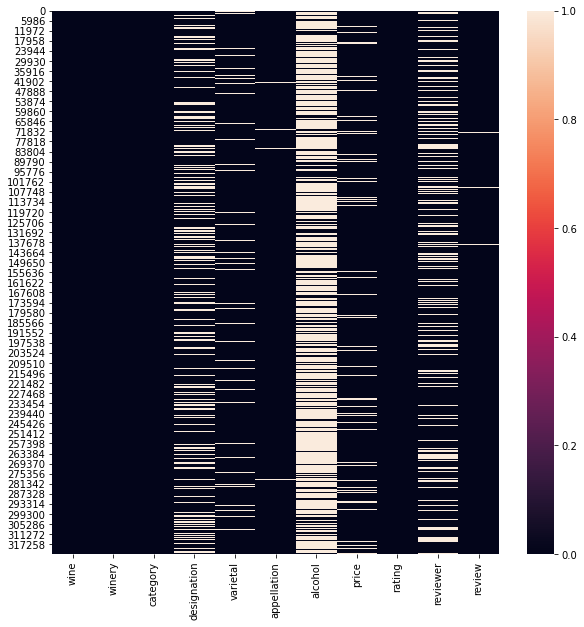

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

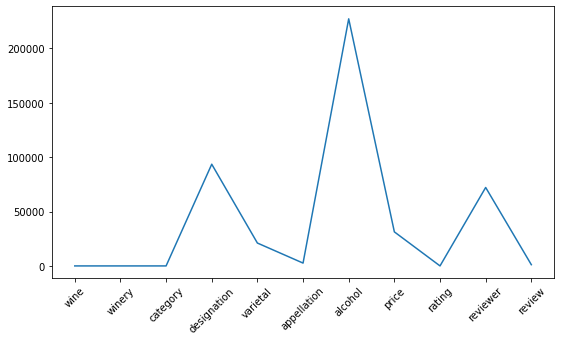

In [8]:
plt.figure(figsize=(9,5))

plt.plot(df.isna().sum().index, df.isna().sum().values)
plt.xticks(rotation=45)
plt.show()

#### Viewing the top `50` wineries in the dataset

In [9]:
top_wineries = df.winery.value_counts()[:50]

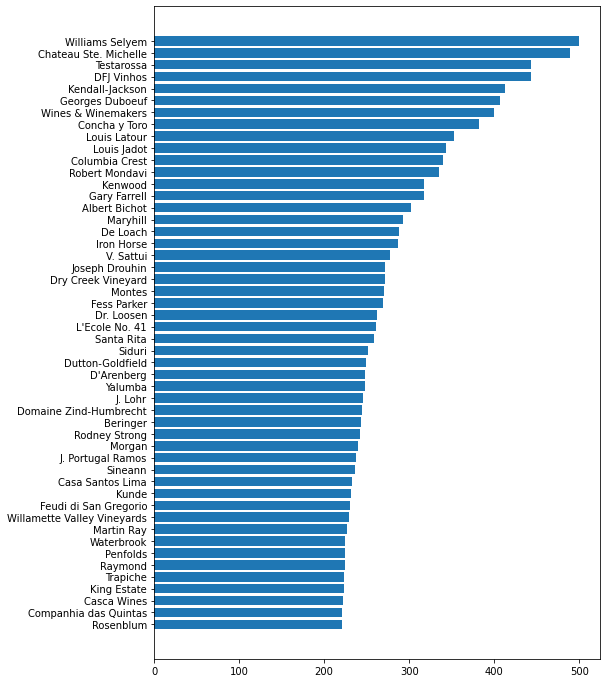

In [10]:
plt.figure(figsize=(8,12))

plt.barh(top_wineries.index[::-1], top_wineries.values[::-1])
plt.show()

In [10]:
px.bar(top_wineries[::-1], orientation='h')

In [22]:
tt = df.winery.value_counts()
tt = tt.where(tt.values > 250).dropna()
tt

px.pie(tt, values=tt.values, names=tt.index, title='Presence of wineries in the dataset')

In [11]:
px.bar(df.category.value_counts()[::-1], orientation='h')

In [12]:
winery_price = df[(df.price >= 14) & (df.price <= 42)][['winery', 'price']].dropna()
wine_price = df[(df.price >= 14) & (df.price <= 42)][['wine', 'price']].dropna()

In [13]:
wnry_agg = winery_price.groupby('winery').agg({'price' : 'mean'})
px.line(wnry_agg[1:601])

In [11]:
winery = input()
tt = df[df.winery == winery]
tt.category.astype('category')
px.scatter(tt,y='price' ,color='category', title=f'Plot for winery : {winery}')

In [15]:
winery = input()
tt = df[df.winery == winery]
tt.designation.astype('category')
px.line(tt,y='price' ,color='designation', title=f'Plot for winery : {winery}')

In [20]:
winery = input()
tt = df[df.winery == winery]
tt.varietal.astype('category')
px.scatter(tt,y='price' ,color='varietal', title=f'Plot for winery : {winery}')

In [22]:
winery = input()
tt = df[df.winery == winery]
px.scatter(tt.rating, color=tt.wine, title=f'Plot for winery : {winery}')

In [25]:
winery = input()
tt = df[df.winery == winery]
px.bar(tt, x='wine', y='alcohol', color='category')

In [26]:
# converting appellation to country name to make geoplotting easier.
def get_country(val):
    if val == val and val:
        return val.split(',')[-1].strip()
    return

df['appellation'] = df['appellation'].apply(get_country)
df = df.rename(columns={'appellation':'country'})

In [27]:
country_wise_count = df['country'].value_counts()

In [28]:
country_wise_count

US              135281
France           59733
Italy            44842
Spain            14946
Portugal         13299
Australia         9596
Chile             9535
Argentina         8740
Austria           7095
Germany           5555
New Zealand       4586
South Africa      3794
Israel            1196
Greece            1157
Buy Now            609
Hungary            333
Romania            331
DrizlyVivino         2
Name: country, dtype: int64

In [29]:
country_code_mapper = {
    'US':'USA',
    'France':'FRA',
    'Italy':'ITA',
    'Spain':'ESP',
    'Portugal':'PRT',
    'Australia':'AUS',
    'Chile':'CHL',
    'Argentina':'ARG',
    'Austria':'ART',
    'Germany':'DEU',
    'New Zealand':'NZL',
    'South Africa':'ZAF',
    'Israel':'ISR',
    'Greece':'GRC',
    'Buy Now': None,
    'Hungary':'HUN',
    'Romania':'ROU',
    'DrizlyVivino':None
}

def get_c_code(val):
    if val:
        return country_code_mapper[val]
    return

df['country_code'] = df.country.apply(get_c_code)

In [30]:
country_wise_count.index = country_code_mapper.values()
country_wise_count

USA    135281
FRA     59733
ITA     44842
ESP     14946
PRT     13299
AUS      9596
CHL      9535
ARG      8740
ART      7095
DEU      5555
NZL      4586
ZAF      3794
ISR      1196
GRC      1157
NaN       609
HUN       333
ROU       331
NaN         2
Name: country, dtype: int64

In [31]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(
        type = 'choropleth',
        locations = country_wise_count.index,
        z = country_wise_count.values,
        text = list(country_code_mapper.keys()),
        colorbar = {'title' : 'Number of records found'},
      )
layout = dict(
    title = 'Country-wise wine records',
    geo = dict(
            showframe = True,
            projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)